In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json


import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

In [40]:
!pip install beautifulsoup4

     |████████████████████████████████| 106 kB 1.4 MB/s eta 0:00:01


# Lecture 05 - Standard data formats, Requests and APIs
by Jan Šíla, based on Vítek Macháček <br>
March 24th, 2020


video content: https://www.loom.com/share/238cd0c4842b49c1a59e055d8ddc2f87

### Contents

* Standardized data representation
* JSON
* XML
* Introduction to BeautifulSoup
* Basics of HTML (+ Element Inspection)
* Introduction to Requests (GET vs. POST) and APIs


### Goals:
    
* be able to work with data that are online
* acquisition, processing - > results
* Today introduction and next week a practical example

### Bit of history of the internet

1964: Paul Baran, a researcher at RAND, invents the basic concept of computers communicating by sending "message blocks" (small packets of data); Welsh physicist Donald Davies has a very similar idea and coins the name "packet switching," which sticks.

1969: The ARPANET computer network is launched, initially linking together four scientific institutions in California and Utah.

1974: Vinton Cerf and Bob Kahn write an influential paper describing how computers linked on a network they called an "internet" could send messages via packet switching, using a protocol (set of formal rules) called TCP (Transmission Control Protocol).

1989: Tim Berners-Lee invents the World Wide Web at CERN, the European particle physics laboratory in Switzerland. It owes a considerable debt to the earlier work of Ted Nelson and Vannevar Bush.


source: (https://www.explainthatstuff.com/internet.html) also checkout the book The Innovators by W. Isaacson

## Structured data
* only data. It does not do anything!
* programming language/machine agnostic - load same data in R, Python, or Excel on any computer
* distributed as text/string and parsed to objects
* Obtained as files, or some data streams from APIs. 

### Purpose
1. Communication 
    * Server -> client
    * Server -> Server
    * Applications within single server/machine
    * Only transferring of data
    * Both sides need to understand the structure

2. Storing
    * self-descriptive
    * human readable
    * also in DBs - SQL, MongoDB etc.

3. Standardization
    * predictability
    * cooperation
    * spillovers from standardization

## Data Formats

* everything are underlying bytes, which get transmitted, put together in the right order and encoded in some more user-friendly objects

### Text files
* logs
* Also HTMLS - well understandable by internet browsers

### CSVs
* tabular data

### JSON
* JavaScript Object Notation
* often *.json* files
* but also used in the web etc.
* supports standard datatypes - strings, integers, floats, lists


### XML

* XML is a software- and hardware-independent tool for storing and transporting data.
* XML was designed to carry data - with focus on what data is
* HTML was designed to display data - with focus on how data looks
* XML tags are not predefined like HTML tags are


# JSON

In [48]:
# general representation of a dictionary
# emphasis on accessibility -> key-value ( hash table )
# contains records, lists, or other dictionaries

teachers = [{'name':'Jozef Baruník','titles':['doc.','PhDr.','Ph.D.','Bc.','Mgr.'],'ID':1234,'courses':['JEM005','JEM116','JEM059','JEM061']},
            {'name':'Martin Hronec','titles':['Bc.','Mgr.'],'ID':3421,'courses':['JEM005','JEM207']},
            {'name':'Lukáš Vácha'}]
courses = {
    'JEM005':{'name':'Advanced Econometrics','ECTS':6,'teachers':[3421,1234]},
    'JEM207':{'name':'Data Processing in Python','ECTS':5,'teachers':[3421]},
    'JEM116':{'name':'Applied Econometrics','ECTS':6,'teachers':[1234]},
    'JEM059':{'name':'Quantitative Finance I.','ECTS':6,'teachers':[1234,5678]},
    'JEM061':{'name':'Quantitative Finance II.','ECTS':6,'teachers':[1234,5678]}
}
jsondata = {'teachers':teachers,'courses':courses}
type(jsondata)

dict

https://jsonformatter.curiousconcept.com/

In [49]:
print(json.dumps(jsondata,indent=4,ensure_ascii=False))

{
    "teachers": [
        {
            "name": "Jozef Baruník",
            "titles": [
                "doc.",
                "PhDr.",
                "Ph.D.",
                "Bc.",
                "Mgr."
            ],
            "ID": 1234,
            "courses": [
                "JEM005",
                "JEM116",
                "JEM059",
                "JEM061"
            ]
        },
        {
            "name": "Martin Hronec",
            "titles": [
                "Bc.",
                "Mgr."
            ],
            "ID": 3421,
            "courses": [
                "JEM005",
                "JEM207"
            ]
        },
        {
            "name": "Lukáš Vácha"
        }
    ],
    "courses": {
        "JEM005": {
            "name": "Advanced Econometrics",
            "ECTS": 6,
            "teachers": [
                3421,
                1234
            ]
        },
        "JEM207": {
            "name": "Data Processing in Python",
           

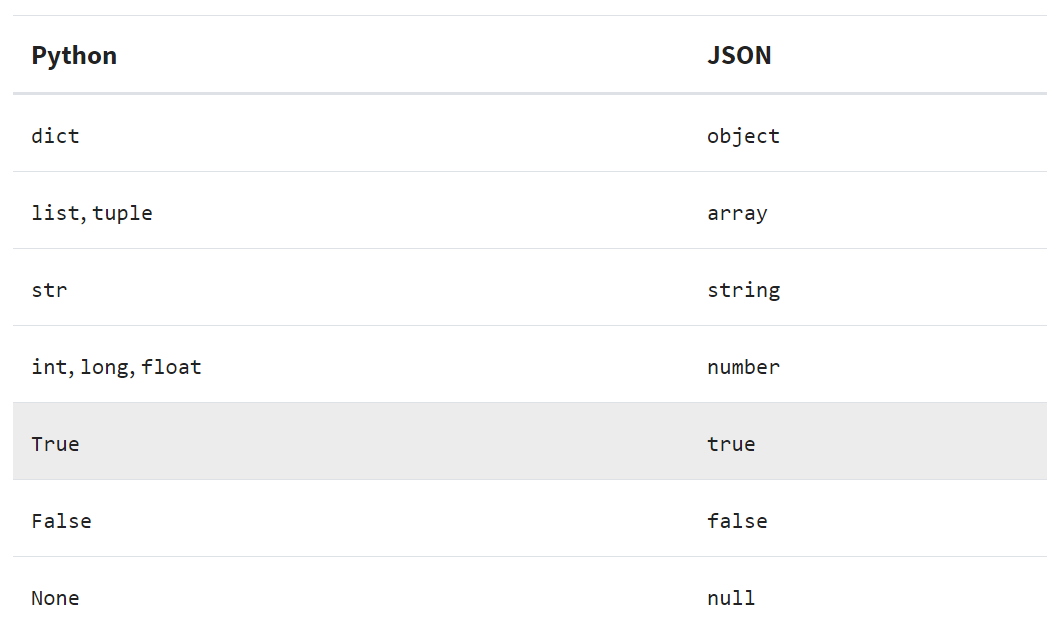

In [50]:
type(json.dumps(jsondata['courses']))

str

In [51]:
pd.read_json(json.dumps(jsondata['courses']))

,JEM005,JEM207,JEM116,JEM059,JEM061
name,Advanced Econometrics,Data Processing in Python,Applied Econometrics,Quantitative Finance I.,Quantitative Finance II.
ECTS,6,5,6,6,6
teachers,"[3421, 1234]",[3421],[1234],"[1234, 5678]","[1234, 5678]"


In [52]:
dfc = pd.read_json(json.dumps(jsondata['courses']),orient='index')
dfc

,name,ECTS,teachers
JEM005,Advanced Econometrics,6,"[3421, 1234]"
JEM207,Data Processing in Python,5,[3421]
JEM116,Applied Econometrics,6,[1234]
JEM059,Quantitative Finance I.,6,"[1234, 5678]"
JEM061,Quantitative Finance II.,6,"[1234, 5678]"


In [53]:
dfc.loc[dfc.teachers.apply(lambda x: 5678 in x)]

,name,ECTS,teachers
JEM059,Quantitative Finance I.,6,"[1234, 5678]"
JEM061,Quantitative Finance II.,6,"[1234, 5678]"


## GeoJSON

* One standardized data format for transferring geodata
* Plenty of geodata out there
* see for example http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json

### first http request

The Hypertext Transfer Protocol (HTTP) is an application protocol for distributed, collaborative, hypermedia information systems. HTTP is the foundation of data communication for the World Wide Web, where hypertext documents include hyperlinks to other resources that the user can easily access, for example by a mouse click or by tapping the screen in a web browser.

source (wikipedia.org)

In [55]:
import requests
d = requests.get('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json').json()

In [57]:
verbose_request = requests.get('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json')

In [67]:
verbose_request.text[:10]

'{\r\n\t"type"'

In [68]:
d['features'][9]['properties']

{'OBJECTID': 10,
 'GRIDVALUE': 1,
 'Shape_Length': 0.03933227019708776,
 'Shape_Area': 4.0634510067403764e-05}

In [69]:
import branca
import folium

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 5)

def style_function(feature):
    gridvalue = feature['properties']['GRIDVALUE']
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': colorscale(gridvalue)
    }

m = folium.Map(location=[50.085,14.45],zoom_start=11)
folium.GeoJson('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json',style_function=style_function).add_to(m)
m

In [70]:
len(d['features'])

221

# eXtensible Markup Language (XML)

* elements
* attributes
* tags

### Tag
> <>

### Element

In [ ]:
#either
'''<element>content</element>'''

#or self-closing (no content)
'''<element />''';
<br /> 

### Attributes

In [ ]:
'''<element attr="value" />''';

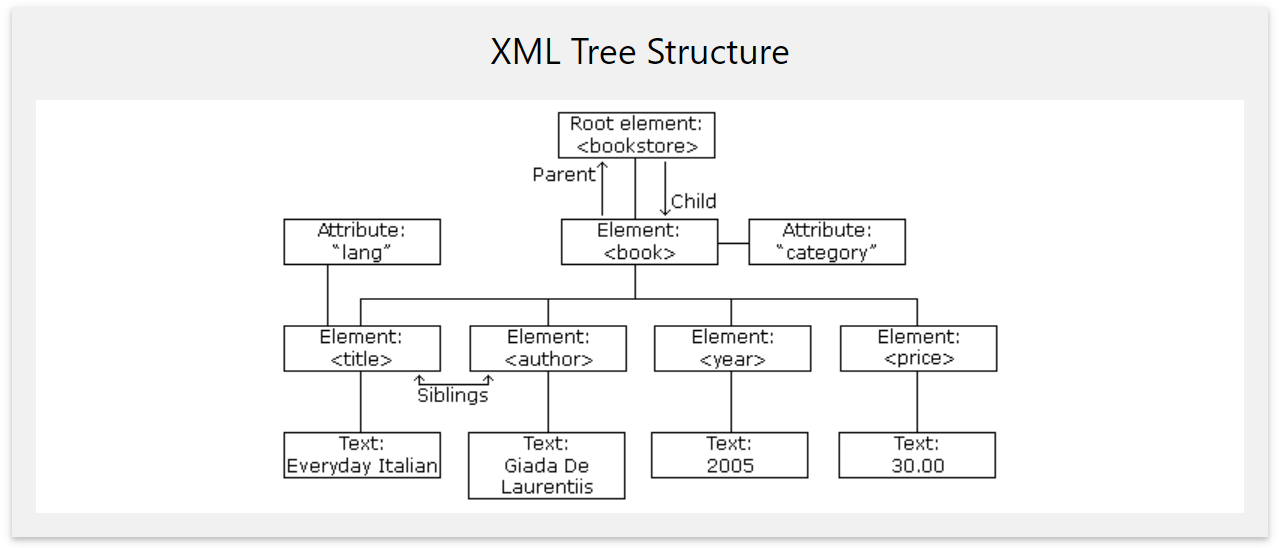

In [71]:
'''
<bookstore>
    <book category="fiction">
        <title lang="ENG">Everyday Italian</title>
        <author>Giada De Laurentis</author>
        <year>2005</year>
        <price>30.00</year>
    </book>
</bookstore>
'''

'\n<bookstore>\n    <book category="fiction">\n        <title lang="ENG">Everyday Italian</title>\n        <author>Giada De Laurentis</author>\n        <year>2005</year>\n        <price>30.00</year>\n    </book>\n</bookstore>\n'


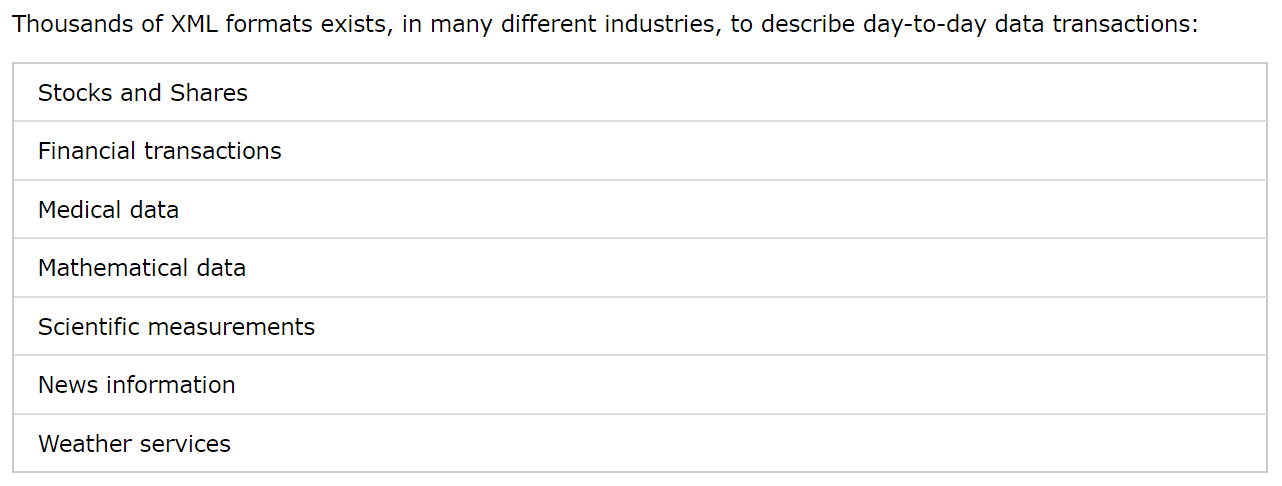

https://www.w3schools.com/xml/xml_rss.asp

## Navigation
* Xpath
* CSS selectors 
* **BeautifulSoup**

### BeatifulSoup in detail
each BS object represents
* an element
* the position in tree

In [73]:
xml = '''
<?xml version="1.0" encoding="utf-8"?>
<ies_data>
    <courses>
        <course id="JEM005" ects="6" name="Advanced Econometrics">
            <teacher-id>3421</teacher-id>
            <teacher-id>1234</teacher-id>
        </course>
        <course id="JEM207" ects="5" name="Data Processing in Python">
            <teacher-id>3421</teacher-id>
        </course>
            <course id="JEM116" ects="6" name="Applied Econometrics I.">
            <teacher-id>1234</teacher-id>
        </course>
        <course id="JEM059" ects="6" name="Quantitative Finance I.">
            <teacher-id>1234</teacher-id>
            <teacher-id>5678</teacher-id>
        </course>
        <course id="JEM061" ects="6" name="Quantitative Finance II.">
            <teacher-id>1234</teacher-id>
            <teacher-id>5678</teacher-id>
        </course>
    </courses>
    <teachers>
        <teacher teacher-id="3421">
            <name>Martin Hronec</name>
        </teacher>
        <teacher teacher-id="1234">
            <name>Jozef Baruník</name>
        </teacher>
        <teacher teacher-id="5678">
            <name>Lukáš Vácha</name>
        </teacher>
    </teachers>
</ies_data>
'''

#unlike HTML, those tag names are defined by Vitek - no one else 'can' understand them -> flexibility

soup = BeautifulSoup(xml,'lxml')

```find()``` will find a **first** element given the input

```find_all()``` or ```findAll()```  finds a **all** elements given the input

In [74]:
jem059 = soup.find('course',{'id':'JEM059'})
type(jem059)

bs4.element.Tag

In [76]:
jem059

<course ects="6" id="JEM059" name="Quantitative Finance I.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>

In [78]:
soup.findAll('teacher-id')

[<teacher-id>3421</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>3421</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>5678</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>5678</teacher-id>]

`soup['attr']` will return the value of attribute 

In [80]:
jem059['ects']

'6'

In [32]:
soup.findAll('teacher-id')

[<teacher-id>3421</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>3421</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>5678</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>5678</teacher-id>]

In [33]:
jem059

<course ects="6" id="JEM059" name="Quantitative Finance I.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>

you can also navigate horizontally

In [85]:
jem059.findNext('course')

<course ects="6" id="JEM061" name="Quantitative Finance II.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>

In [86]:
jem059.findPrevious('course')

<course ects="6" id="JEM116" name="Applied Econometrics I.">
<teacher-id>1234</teacher-id>
</course>

and even upstream!

In [93]:
jem059.parent.parent

<ies_data>
<courses>
<course ects="6" id="JEM005" name="Advanced Econometrics">
<teacher-id>3421</teacher-id>
<teacher-id>1234</teacher-id>
</course>
<course ects="5" id="JEM207" name="Data Processing in Python">
<teacher-id>3421</teacher-id>
</course>
<course ects="6" id="JEM116" name="Applied Econometrics I.">
<teacher-id>1234</teacher-id>
</course>
<course ects="6" id="JEM059" name="Quantitative Finance I.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>
<course ects="6" id="JEM061" name="Quantitative Finance II.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>
</courses>
<teachers>
<teacher teacher-id="3421">
<name>Martin Hronec</name>
</teacher>
<teacher teacher-id="1234">
<name>Jozef Baruník</name>
</teacher>
<teacher teacher-id="5678">
<name>Lukáš Vácha</name>
</teacher>
</teachers>
</ies_data>

In [95]:
[int(t.text) for t in soup.findAll('teacher-id')]

[3421, 1234, 3421, 1234, 1234, 5678, 1234, 5678]

In [97]:
course = soup.find('course')
d = {
    'id':course['id'],
    'name':course['name'],
    'ects':course['ects'],
    'teachers':[int(t.text) for t in course.findAll('teacher-id')]
}
d

{'id': 'JEM005',
 'name': 'Advanced Econometrics',
 'ects': '6',
 'teachers': [3421, 1234]}

### Can convert to JSON-like

In [99]:
l = []
for course in soup.findAll('course'):
    d = {'id':course['id'],
         'name':course['name'],
         'ects':course['ects'],
         'teachers':[int(t.text) for t in course.findAll('teacher-id')]}
    l.append(d)
l

[{'id': 'JEM005',
  'name': 'Advanced Econometrics',
  'ects': '6',
  'teachers': [3421, 1234]},
 {'id': 'JEM207',
  'name': 'Data Processing in Python',
  'ects': '5',
  'teachers': [3421]},
 {'id': 'JEM116',
  'name': 'Applied Econometrics I.',
  'ects': '6',
  'teachers': [1234]},
 {'id': 'JEM059',
  'name': 'Quantitative Finance I.',
  'ects': '6',
  'teachers': [1234, 5678]},
 {'id': 'JEM061',
  'name': 'Quantitative Finance II.',
  'ects': '6',
  'teachers': [1234, 5678]}]

In [100]:
pd.DataFrame(l)

,id,name,ects,teachers
0,JEM005,Advanced Econometrics,6,"[3421, 1234]"
1,JEM207,Data Processing in Python,5,[3421]
2,JEM116,Applied Econometrics I.,6,[1234]
3,JEM059,Quantitative Finance I.,6,"[1234, 5678]"
4,JEM061,Quantitative Finance II.,6,"[1234, 5678]"


# HTML
standard web-page consists of:

* Client side **(front-end)**
    * HTML "DOM" structure - the website content
    * CSS stylesheets - website graphics
    * JavaScripts - website interactivity
* Server side **(back-end)**
    * Server, database, app logic etc.

## Web-scraping
* client side only
* Navigating HTML DOM by taking advantage of CSS structure

## DOM (Document Object Module):


In [101]:
html = '''
<html>
    <head>
        <title>Sample page</title>
        
    <script></script>
    </head>
    
    <body>
        <div id="header">
            My page header
        </div>
        <div id="content">
            <table>
                <tr class="firstRow">
                    <td>name</td>
                    <td>number</td>
                </tr>
                <tr class="normalRow">
                    <td>B</td>
                    <td>2</td>
                </tr>
                <tr class="normalRow">
                    <td>C</td>
                    <td>3</td>
                </tr>
            </table>
        </div>
    </body>
</html>
'''
from IPython.core.display import display, HTML
display(HTML(html))

name,number
B,2
C,3


In [106]:
soup = BeautifulSoup(html,'html')
rows = soup.findAll('tr',{'class','normalRow'})

In [108]:
rows


[<tr class="normalRow">
 <td>B</td>
 <td>2</td>
 </tr>,
 <tr class="normalRow">
 <td>C</td>
 <td>3</td>
 </tr>]

In [109]:
d = {}

for row in rows:
    key = row.findAll('td')[0].text
    val = int(row.findAll('td')[1].text)
    d[key] = val
pd.Series(d)

B    2
C    3
dtype: int64

In [110]:
from bs4 import BeautifulSoup

pd.Series({row.findAll('td')[0].text:int(row.findAll('td')[1].text) for row in BeautifulSoup(html,'xml').findAll('tr',{'class':'normalRow'})})

B    2
C    3
dtype: int64

In [111]:
soup = BeautifulSoup(html,'xml')

In [55]:
row = soup.findAll('tr',{'class':'normalRow'})[0]

In [56]:
row.findAll('td')[0].text

'B'

In [57]:
int(row.findAll('td')[1].text)

2

In [58]:
{row.findAll('td')[0].text:int(row.findAll('td')[1].text) for row in soup.findAll('tr',{'class':'normalRow'})}

{'B': 2, 'C': 3}

## HTML Inspection
http://ies.fsv.cuni.cz/cs/node/51

# APIs and requests

API = *Application Programming Interface*

very often webserver's endpoint - REST API

[Example API](http://dummy.restapiexample.com/)

### When to use?
* whenever more applications need to communicate automatically
* user-friendly interface for complicated tasks - DEEP AI
* Data - scientometrics etc.

### GET request
* fast
* public
* data flow only one direction
* parameters via request adress

> vitekzkytek.cz/index.html?name1=value1&name2=value2

In [ ]:
import requests
r = requests.get('https://cs.wikipedia.org/wiki/Institut_ekonomick%C3%BDch_studi%C3%AD_Fakulty_soci%C3%A1ln%C3%ADch_v%C4%9Bd_Univerzity_Karlovy')
r.text

### POST request
* slow
* private
* both sides can send data

In [ ]:
?requests.post

## Static pages x Dynamic pages

### Static
* generated from a set of simple GET requests
* all information necessary for rendering a website is available after GET requests are finished
* renedring happens on client's side - in your browser
* all parameters within the adress!


### Dynamic content
* webpage communicates with the webserver and the database
* solution -> Selenium!

## How to chose data source for project

You need to know in advance what data you will download:

1. full or satisfactory access to API
2. the web-page is parsable (prefer not too much javascript)
3. plan to generate all requests

# APIs Example
### Get wiki data using GET

In [112]:
import requests
from bs4 import BeautifulSoup
response = requests.get('https://en.wikipedia.org/wiki/Charles_University')
soup = BeautifulSoup(response.text,'lxml')
div = soup.find('div',{'id':'mw-content-text'}) #  #mw-content-text > div > p:nth-child(10)texts)
article = ' '.join([p.text for p in div.find_all('p')])
article

'Charles University, known also as Charles University in Prague (Czech: Univerzita Karlova; Latin: Universitas Carolina; German: Karls-Universität) or historically as the University of Prague (Latin: Universitas Pragensis), is the oldest and largest university in the Czech Republic. Founded in 1348, it was the first university in Central Europe.[3] It is one of the oldest universities in Europe in continuous operation.[4] Today, the university consists of 17 faculties located in Prague, Hradec Králové and Pilsen. Its academic publishing house is Karolinum Press. The university also operates several museums and two botanical gardens.\n Its seal shows its protector Emperor Charles IV, with his coats of arms as King of the Romans and King of Bohemia, kneeling in front of Saint Wenceslas, the patron saint of Bohemia. It is surrounded by the inscription, Sigillum Universitatis Scolarium Studii Pragensis (English: Seal of the Prague academia).[5]\n The establishment of a medieval university 

### Ask DeepAI using POST request

In [113]:
%run '/home/vitekzkytek/jupyter/PythonDataIES/auth.py'

r = requests.post(
    "https://api.deepai.org/api/summarization",
    data={
        'text': article,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()['output']

ERROR:root:File `'/home/vitekzkytek/jupyter/PythonDataIES/auth.py'` not found.


NameError: name 'DEEPAI_API_KEY' is not defined

# Bonus example:

<img src="http://ies.fsv.cuni.cz/default/file/get/id/31996" height="500" width="300">

In [114]:
img = 'http://ies.fsv.cuni.cz/default/file/get/id/31996'
r = requests.post(
    "https://api.deepai.org/api/demographic-recognition",
    data={
        'image': img,
    },
    headers={'api-key': os.environ['DEEPAI_API_KEY']} #using environmental variable
)
r.json()


{'output': {'faces': [{'age_range': [15, 31],
    'cultural_appearance_confidence': 0.52,
    'gender': 'Male',
    'age_range_confidence': 0.61,
    'bounding_box': [336, 483, 659, 659],
    'gender_confidence': 0.94,
    'cultural_appearance': 'White'}]},
 'id': 'c2e3e98e-8c0b-4a6c-b654-c13c8d1926f4'}

In [116]:
r = requests.post(
    "https://api.deepai.org/api/nsfw-detector",
    data={
        'image': img,
    },
    headers={'api-key': os.environ['DEEPAI_API_KEY']}
)
r.json()


{'output': {'detections': [], 'nsfw_score': 0.000638041936326772},
 'id': '5722f0ba-0620-416b-862c-1dbe4d37d51e'}

In [117]:
r = requests.post(
    "https://api.deepai.org/api/celebrity-recognition",
    data={
        'image': img,
    },
    headers={'api-key': os.environ['DEEPAI_API_KEY']}
)
r.json()


{'output': {'celebrities': [{'bounding_box': [353, 481, 573, 573],
    'confidence': '0.71',
    'name': 'ash stymest'}]},
 'id': '66eb1ecc-5c65-438b-958b-2097891bb9fb'}